# Opening Situation
![A soccer pitch for an international match.](soccer-pitch.jpg)

You're working as a sports journalist at a major online sports media company, specializing in soccer analysis and reporting. You've been watching both men's and women's international soccer matches for a number of years, and your gut instinct tells you that more goals are scored in women's international football matches than men's. This would make an interesting investigative article that your subscribers are bound to love, but you'll need to perform a valid statistical hypothesis test to be sure!

While scoping this project, you acknowledge that the sport has changed a lot over the years, and performances likely vary a lot depending on the tournament, so you decide to limit the data used in the analysis to only official `FIFA World Cup` matches (not including qualifiers) since `2002-01-01`.

You create two datasets containing the results of every official men's and women's international football match since the 19th century, which you scraped from a reliable online source. This data is stored in two CSV files: `women_results.csv` and `men_results.csv`.

The question you are trying to determine the answer to is:

> Are more goals scored in women's international soccer matches than men's?

You assume a **10% significance level**, and use the following null and alternative hypotheses:

$H_0$ : The mean number of goals scored in women's international soccer matches is the same as men's.

$H_A$ : The mean number of goals scored in women's international soccer matches is greater than men's.

## Import dataset

In [170]:
# Start your code here!
import pandas as pd

men = pd.read_csv('men_results.csv')
men.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1872-11-30,Scotland,England,0,0,Friendly
1,1,1873-03-08,England,Scotland,4,2,Friendly
2,2,1874-03-07,Scotland,England,2,1,Friendly
3,3,1875-03-06,England,Scotland,2,2,Friendly
4,4,1876-03-04,Scotland,England,3,0,Friendly


In [171]:
women = pd.read_csv('women_results.csv')
women.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
0,0,1969-11-01,Italy,France,1,0,Euro
1,1,1969-11-01,Denmark,England,4,3,Euro
2,2,1969-11-02,England,France,2,0,Euro
3,3,1969-11-02,Italy,Denmark,3,1,Euro
4,4,1975-08-25,Thailand,Australia,3,2,AFC Championship


## EDA dataset

**Filter date only FIFA World Cup**

In [172]:
men_wc = men[men['tournament'] == 'FIFA World Cup']
women_wc = women[women['tournament'] == 'FIFA World Cup']

_**Short summary of data**_

In [173]:
men_wc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 964 entries, 1311 to 44352
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  964 non-null    int64 
 1   date        964 non-null    object
 2   home_team   964 non-null    object
 3   away_team   964 non-null    object
 4   home_score  964 non-null    int64 
 5   away_score  964 non-null    int64 
 6   tournament  964 non-null    object
dtypes: int64(3), object(4)
memory usage: 60.2+ KB


In [174]:
women_wc.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 284 entries, 429 to 4469
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  284 non-null    int64 
 1   date        284 non-null    object
 2   home_team   284 non-null    object
 3   away_team   284 non-null    object
 4   home_score  284 non-null    int64 
 5   away_score  284 non-null    int64 
 6   tournament  284 non-null    object
dtypes: int64(3), object(4)
memory usage: 17.8+ KB


_**Select data after 2002-01-01. Therefore, that is the data we use for the hypothesis testing**_

In [175]:
men_data = men_wc[men_wc['date'] >= '2002-01-01']
women_data = women_wc[women_wc['date'] >= '2002-01-01']

In [176]:
men_data.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
25164,25164,2002-05-31,France,Senegal,0,1,FIFA World Cup
25165,25165,2002-06-01,Germany,Saudi Arabia,8,0,FIFA World Cup
25166,25166,2002-06-01,Republic of Ireland,Cameroon,1,1,FIFA World Cup
25167,25167,2002-06-01,Uruguay,Denmark,1,2,FIFA World Cup
25168,25168,2002-06-02,Argentina,Nigeria,1,0,FIFA World Cup


In [177]:
women_data.head()

,Unnamed: 0,date,home_team,away_team,home_score,away_score,tournament
1600,1600,2003-09-20,Nigeria,North Korea,0,3,FIFA World Cup
1601,1601,2003-09-20,Norway,France,2,0,FIFA World Cup
1602,1602,2003-09-20,Germany,Canada,4,1,FIFA World Cup
1603,1603,2003-09-20,Japan,Argentina,6,0,FIFA World Cup
1604,1604,2003-09-21,United States,Sweden,3,1,FIFA World Cup


Create a column name 'Goal_Match' = 'home_score' + 'away_score'

In [178]:
men_data['Goal_Match'] = men_data['home_score'] + men_data['away_score']
women_data['Goal_Match'] = women_data['home_score'] + women_data['away_score']

Calculate Mean Goal per match of men and women

In [179]:
men_data['Goal_Match'].describe()

count    384.000000
mean       2.513021
std        1.652544
min        0.000000
25%        1.000000
50%        2.000000
75%        3.000000
max        8.000000
Name: Goal_Match, dtype: float64

In [180]:
women_data['Goal_Match'].describe()

count    200.000000
mean       2.980000
std        2.022387
min        0.000000
25%        2.000000
50%        3.000000
75%        4.000000
max       13.000000
Name: Goal_Match, dtype: float64

## Hypothesis

Ho: The mean number of goals scored in women's international soccer matches is the same as men's.

Ha: The mean number of goals scored in women's international soccer matches is greater than men's.

## Statistic analysis

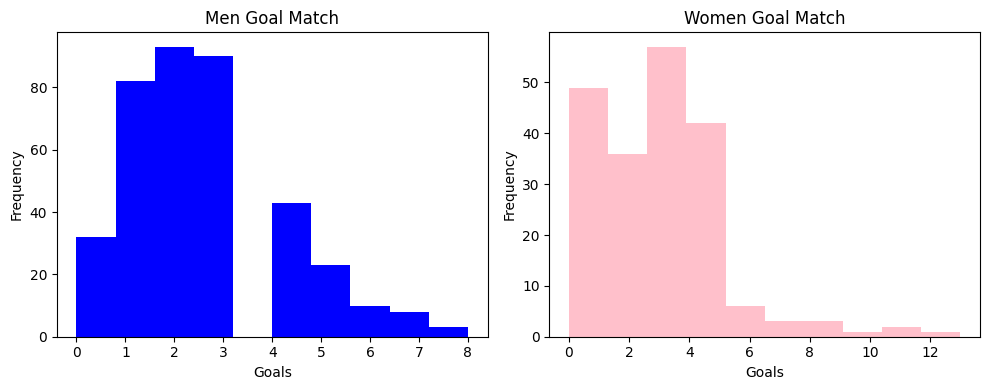

In [181]:
import matplotlib.pyplot as plt

# Create a figure with two subplots
fig, axs = plt.subplots(1, 2, figsize=(10, 4))

# Plot histogram for men_data['Goal_Match']
axs[0].hist(men_data['Goal_Match'], bins=10, color='blue')
axs[0].set_title('Men Goal Match')
axs[0].set_xlabel('Goals')
axs[0].set_ylabel('Frequency')

# Plot histogram for women_data['Goal_Match']
axs[1].hist(women_data['Goal_Match'], bins=10, color='pink')
axs[1].set_title('Women Goal Match')
axs[1].set_xlabel('Goals')
axs[1].set_ylabel('Frequency')

# Adjust spacing between subplots
plt.tight_layout()

# Show the plot
plt.show()

**We can see the distribution of goal for both men and women are not normal distribution. Therefore, we will use non-parametric test.
In this case, we will use Mann Whitney U test**

## Doing hypothesis testing

Combine Men Goal vs Women Goal

In [182]:
print(men_data.shape)
print(women_data.shape)

(384, 8)
(200, 8)


In [183]:
goal_men = men_data['Goal_Match']
goal_women = women_data['Goal_Match']

with alpha = 0.01

In [184]:
import pingouin
math = pingouin.mwu(goal_women,goal_men,alternative='greater')

In [185]:
p_val = math['p-val'].item()
p_val

0.005106609825443641

In [186]:
alpha = 0.01

if p_val < alpha:
    result = "reject"
else:
    result = "fail to reject"
print(result)

reject


In [187]:
result_dict = {"p_val": p_val, "result": result}
result_dict

{'p_val': 0.005106609825443641, 'result': 'reject'}

## Conclusion

Ha: The mean number of goals scored in women's international soccer matches is greater than men's.